24MAI0091
VENKAT RAMANA G

# Use Case 1: Real-Time Sales Data Analysis and Insights

In [88]:
print(''' Problem Statement:
You are working for a retail company that wants to gain 
insights into their sales performance across different stores and products. The 
company has been collecting real-time sales data from multiple stores, and 
your task is to clean, process, and analyze the data to derive meaningful 
insights and create visual representations \n''')
print("Task's to be done are :\n1.Data Cleaning\n2.Data Aggregation\n3.Analysis\n4.Data Visualization")

 Problem Statement:
You are working for a retail company that wants to gain 
insights into their sales performance across different stores and products. The 
company has been collecting real-time sales data from multiple stores, and 
your task is to clean, process, and analyze the data to derive meaningful 
insights and create visual representations 

Task's to be done are :
1.Data Cleaning
2.Data Aggregation
3.Analysis
4.Data Visualization


Importing Essential Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [22]:
sales_data = pd.read_csv('sales_data.csv', parse_dates=['Date'])

Printing the 1st and Last 5 rows to understand the dataset

In [23]:
sales_data.head()

,Date,Store ID,Product ID,Units Sold,Sales Amount,Discount Applied,Customer Segment
0,2023-01-01,3,19,8.0,470.543543,10.0,Premium
1,2023-01-02,2,12,NaN,80.475834,10.0,Regular
2,2023-01-03,3,17,93.0,242.839372,15.0,Regular
3,2023-01-04,1,19,16.0,56.990596,NaN,Wholesale
4,2023-01-05,1,5,95.0,227.505512,5.0,Regular


In [91]:
print(sales_data.tail())
print("24MAI0091\nVENKAT RAMANA G\nUSE CASE 01 IMPLEMENTATION..")
print("\n")

         Date  Store ID  Product ID  Units Sold  Sales Amount  \
95 2023-04-06         2           4        51.0    211.239921   
96 2023-04-07         3          18        87.0     92.150323   
97 2023-04-08         4           1        89.0    369.638664   
98 2023-04-09         1           8        52.0     83.112951   
99 2023-04-10         1           1        66.0    302.599159   

    Discount Applied Customer Segment  Week  Month  Discount Change  \
95          5.000000          Regular    14      4        -0.500000   
96         10.000000          Premium    14      4         1.000000   
97         15.000000          Regular    14      4         0.500000   
98          5.000000          Regular    14      4        -0.666667   
99          8.333333        Wholesale    15      4         0.666667   

    Sales Change  Elasticity  Cumulative Sales  
95     -0.283525    0.567050      23537.378577  
96     -0.563765   -0.563765      23629.528900  
97      3.011257    6.022515      2

In [25]:
sales_data.shape

(100, 7)

In [26]:
sales_data.columns

Index(['Date', 'Store ID', 'Product ID', 'Units Sold', 'Sales Amount',
       'Discount Applied', 'Customer Segment'],
      dtype='object')

Printing the Statistical part

In [27]:
sales_data.describe()

,Date,Store ID,Product ID,Units Sold,Sales Amount,Discount Applied
count,100,100.000000,100.000000,90.000000,85.000000,88.000000
mean,2023-02-19 12:00:00,2.430000,10.720000,50.477778,247.264116,9.204545
min,2023-01-01 00:00:00,1.000000,1.000000,1.000000,52.145417,5.000000
25%,2023-01-25 18:00:00,1.000000,5.000000,27.500000,135.062983,5.000000
50%,2023-02-19 12:00:00,2.000000,11.000000,47.000000,225.509979,10.000000
75%,2023-03-16 06:00:00,3.000000,16.000000,78.750000,369.638664,10.000000
max,2023-04-10 00:00:00,4.000000,19.000000,99.000000,483.285577,15.000000
std,NaN,1.148165,5.798084,29.692517,130.414405,3.781866


Now Checking for Presence of Null Values or not in the dataset

In [28]:
print(sales_data.isnull().sum())

Date                 0
Store ID             0
Product ID           0
Units Sold          10
Sales Amount        15
Discount Applied    12
Customer Segment     0
dtype: int64


Task 1 : Data Cleaning

( i ) --> Handling Missing Values through KNN Imputation

In [30]:
# Missing Values - KNN Imputation for numeric columns
numeric_cols = ['Units Sold', 'Sales Amount', 'Discount Applied']
imputer = KNNImputer(n_neighbors=3)
sales_data[numeric_cols] = imputer.fit_transform(sales_data[numeric_cols])

Predictive Modeling Imputation for 'Sales Amount' based on Units Sold and Discount Applied

In [31]:
missing_sales_data = sales_data[sales_data['Sales Amount'].isna()]
if not missing_sales_data.empty:
    known_data = sales_data[sales_data['Sales Amount'].notna()]
    X_known = known_data[['Units Sold', 'Discount Applied']]
    y_known = known_data['Sales Amount']
    model = LinearRegression()
    model.fit(X_known, y_known)
    X_missing = missing_sales_data[['Units Sold', 'Discount Applied']]
    sales_data.loc[sales_data['Sales Amount'].isna(), 'Sales Amount'] = model.predict(X_missing)

Printing the Data Quality Report after handling the NULL Values

In [32]:
data_quality_report = sales_data.isnull().sum().reset_index()
data_quality_report.columns = ['Column', 'Missing Values']
data_quality_report['% Missing'] = (data_quality_report['Missing Values'] / len(sales_data)) * 100
print("Data Quality Report:\n", data_quality_report)

Data Quality Report:
              Column  Missing Values  % Missing
0              Date               0        0.0
1          Store ID               0        0.0
2        Product ID               0        0.0
3        Units Sold               0        0.0
4      Sales Amount               0        0.0
5  Discount Applied               0        0.0
6  Customer Segment               0        0.0


( Outlier Detection and Visualization

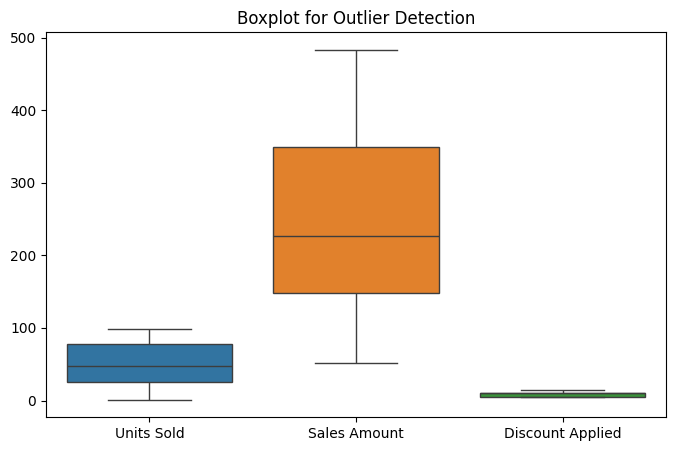

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=sales_data[numeric_cols])
plt.title("Boxplot for Outlier Detection")
plt.show()

( iii ) --> Checking for Incorrect Formats

In [37]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')

In [39]:
print(sales_data.dtypes)


Date                datetime64[ns]
Store ID                     int64
Product ID                   int64
Units Sold                 float64
Sales Amount               float64
Discount Applied           float64
Customer Segment            object
dtype: object


Task 02 : Data Aggregation

( i ) --> Aggregation by Customer Segment

In [40]:
customer_segment_agg = sales_data.groupby('Customer Segment').agg(
    Total_Sales=('Sales Amount', 'sum'),
    Avg_Sales=('Sales Amount', 'mean'),
    Units_Sold=('Units Sold', 'sum')
).reset_index()
print("Customer Segment Aggregation:\n", customer_segment_agg)

Customer Segment Aggregation:
   Customer Segment  Total_Sales   Avg_Sales   Units_Sold
0          Premium  7217.454164  300.727257  1331.000000
1          Regular  9324.177201  245.373084  2112.477778
2        Wholesale  7843.248309  206.401271  1574.000000


( ii ) --> Weekly and Monthly Aggregation

In [41]:
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
sales_data['Month'] = sales_data['Date'].dt.month
weekly_sales = sales_data.groupby('Week').agg(Total_Sales=('Sales Amount', 'sum')).reset_index()
monthly_sales = sales_data.groupby('Month').agg(Total_Sales=('Sales Amount', 'sum')).reset_index()
print("Weekly Sales:\n", weekly_sales)
print("Monthly Sales:\n", monthly_sales)

Weekly Sales:
     Week  Total_Sales
0      1  1398.404748
1      2  2272.508415
2      3  1799.893334
3      4  1622.979030
4      5  1903.025494
5      6  2015.721249
6      7  1665.144217
7      8  1668.170144
8      9  1619.957180
9     10  1781.688204
10    11  1184.744714
11    12  1531.648208
12    13  1276.119454
13    14  1871.732581
14    15   302.599159
15    52   470.543543
Monthly Sales:
    Month  Total_Sales
0      1  8330.618087
1      2  6861.327890
2      3  6574.647660
3      4  2618.286038


( iii ) --> Aggregate by Date, Store, and Product

In [46]:
date_agg = sales_data.groupby('Date').agg(
    Total_Sales=('Sales Amount', 'sum'),
    Average_Sales=('Sales Amount', 'mean'),
    Units_Sold=('Units Sold', 'sum')
).reset_index()
print("Daily Aggregation:\n", date_agg.head())
print("24MAI0091\nVENKAT RAMANA G\nUSE CASE 01 IMPLEMENTATION..\n")

Daily Aggregation:
         Date  Total_Sales  Average_Sales  Units_Sold
0 2023-01-01   470.543543     470.543543         8.0
1 2023-01-02    80.475834      80.475834        25.0
2 2023-01-03   242.839372     242.839372        93.0
3 2023-01-04    56.990596      56.990596        16.0
4 2023-01-05   227.505512     227.505512        95.0
24MAI0091
VENKAT RAMANA G
USE CASE 01 IMPLEMENTATION..



In [47]:
store_agg = sales_data.groupby('Store ID').agg(
    Total_Sales=('Sales Amount', 'sum'),
    Average_Sales=('Sales Amount', 'mean'),
    Units_Sold=('Units Sold', 'sum')
).reset_index()
print("Store Aggregation:\n", store_agg)

Store Aggregation:
    Store ID  Total_Sales  Average_Sales   Units_Sold
0         1  6783.875605     233.926745  1596.666667
1         2  5422.779562     235.773024   953.000000
2         3  6219.967696     259.165321  1191.811111
3         4  5958.256811     248.260700  1276.000000


In [51]:
product_agg = sales_data.groupby('Product ID').agg(
    Total_Sales=('Sales Amount', 'sum'),
    Average_Sales=('Sales Amount', 'mean'),
    Units_Sold=('Units Sold', 'sum')
).reset_index()
print("24MAI0091\nVENKAT RAMANA G\nUSE CASE 01 IMPLEMENTATION..")
print("\n")
print("Product Aggregation:\n", product_agg)

24MAI0091
VENKAT RAMANA G
USE CASE 01 IMPLEMENTATION..


Product Aggregation:
     Product ID  Total_Sales  Average_Sales  Units_Sold
0            1  1226.978725     245.395745  317.000000
1            2   749.251727     249.750576  220.477778
2            3   661.755032     220.585011  135.000000
3            4  2700.971048     270.097105  529.000000
4            5  1790.142545     255.734649  313.000000
5            6   992.112171     248.028043  178.000000
6            7  1041.266866     208.253373  207.000000
7            8   841.892996     280.630999  186.000000
8            9  1069.821646     356.607215  141.000000
9           10   609.027365     304.513683  124.000000
10          11  1753.585800     292.264300  348.000000
11          12   867.803386     173.560677  215.000000
12          13   584.972356     146.243089  164.000000
13          14  1458.010504     291.602101  126.000000
14          15   907.564901     181.512980  299.000000
15          16  1966.369711     245.79621

Task 03 : Analysis

( i ) --> Calculating total sales and average sales per product

In [52]:
total_sales_per_product = product_agg[['Product ID', 'Total_Sales', 'Average_Sales']]
print("Total and Average Sales per Product:\n", total_sales_per_product)

Total and Average Sales per Product:
     Product ID  Total_Sales  Average_Sales
0            1  1226.978725     245.395745
1            2   749.251727     249.750576
2            3   661.755032     220.585011
3            4  2700.971048     270.097105
4            5  1790.142545     255.734649
5            6   992.112171     248.028043
6            7  1041.266866     208.253373
7            8   841.892996     280.630999
8            9  1069.821646     356.607215
9           10   609.027365     304.513683
10          11  1753.585800     292.264300
11          12   867.803386     173.560677
12          13   584.972356     146.243089
13          14  1458.010504     291.602101
14          15   907.564901     181.512980
15          16  1966.369711     245.796214
16          17  1420.327190     202.903884
17          18  1913.651538     239.206442
18          19  1829.374167     261.339167


( ii ) -->  Identifying the store with the highest sales performance.

In [53]:
# Identify the store with the highest sales performance
top_store = store_agg.loc[store_agg['Total_Sales'].idxmax()]
print("Top Performing Store:\n", top_store)
print("\n")
print("24MAI0091\nVENKAT RAMANA G\nUSE CASE 01 IMPLEMENTATION..")

Top Performing Store:
 Store ID            1.000000
Total_Sales      6783.875605
Average_Sales     233.926745
Units_Sold       1596.666667
Name: 0, dtype: float64


24MAI0091
VENKAT RAMANA G
USE CASE 01 IMPLEMENTATION..


( iii ) --> Analyze the impact of discounts on sales amounts

In [55]:
# Discount Elasticity of Demand
sales_data['Discount Change'] = sales_data['Discount Applied'].pct_change()
sales_data['Sales Change'] = sales_data['Sales Amount'].pct_change()
sales_data['Elasticity'] = sales_data['Sales Change'] / sales_data['Discount Change']
print("Discount Elasticity of Demand:\n", sales_data[['Discount Applied', 'Sales Amount', 'Elasticity']].dropna())

Discount Elasticity of Demand:
     Discount Applied  Sales Amount  Elasticity
1          10.000000     80.475834        -inf
2          15.000000    242.839372    4.035088
3           8.333333     56.990596    1.721960
4           5.000000    227.505512   -7.479958
5          10.000000    218.923545   -0.037722
..               ...           ...         ...
95          5.000000    211.239921    0.567050
96         10.000000     92.150323   -0.563765
97         15.000000    369.638664    6.022515
98          5.000000     83.112951    1.162726
99          8.333333    302.599159    3.961228

[99 rows x 3 columns]


Cumulative Sales for Growth Analysis


In [58]:
sales_data['Cumulative Sales'] = sales_data['Sales Amount'].cumsum()

In [59]:
sales_data['Cumulative Sales']

0       470.543543
1       551.019377
2       793.858749
3       850.849345
4      1078.354857
          ...     
95    23537.378577
96    23629.528900
97    23999.167564
98    24082.280515
99    24384.879674
Name: Cumulative Sales, Length: 100, dtype: float64

In [61]:
discounted_sales = sales_data[sales_data['Discount Applied'] > 0]['Sales Amount'].sum()
non_discounted_sales = sales_data[sales_data['Discount Applied'] == 0]['Sales Amount'].sum()
print("Discounted Sales Total:", discounted_sales)
print("Non-Discounted Sales Total:", non_discounted_sales)
print("\n")
print("24MAI0091\nVENKAT RAMANA G\nUSE CASE 01 IMPLEMENTATION..")

Discounted Sales Total: 24384.879674370284
Non-Discounted Sales Total: 0.0


24MAI0091
VENKAT RAMANA G
USE CASE 01 IMPLEMENTATION..


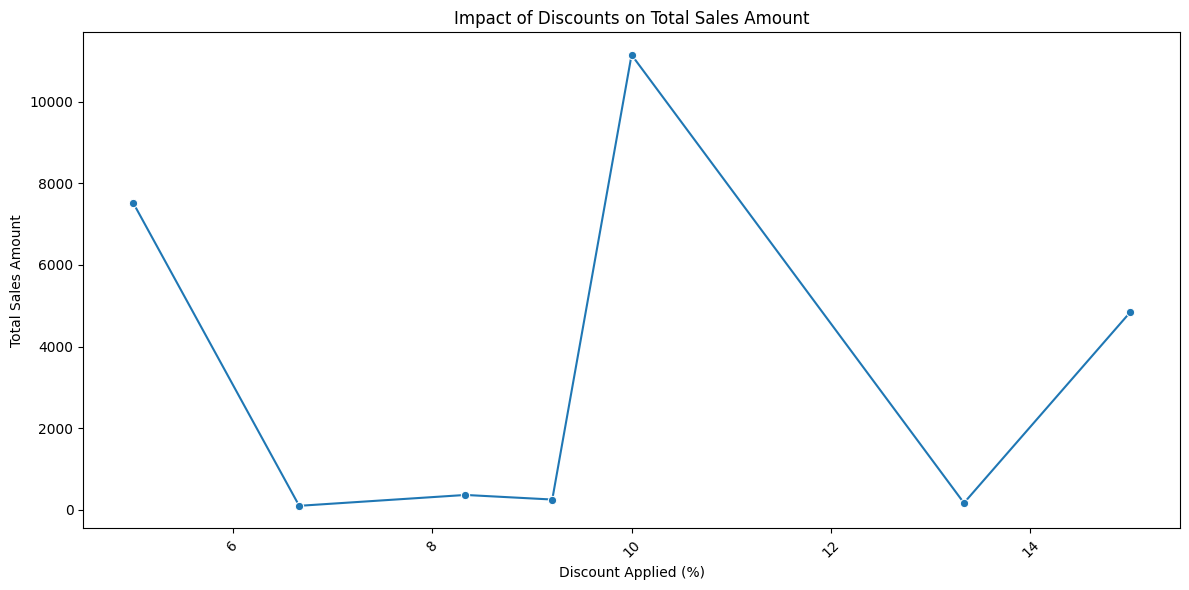

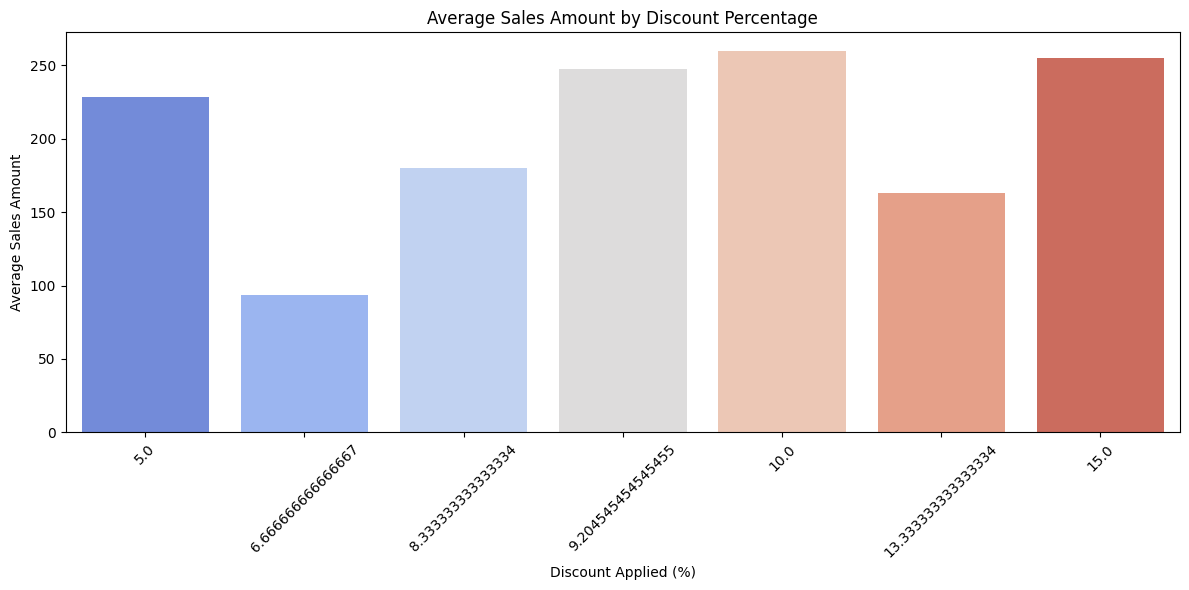

In [98]:
# Creating the discounted_sales DataFrame with total and average sales by discount

discounted_sales = sales_data.groupby('Discount Applied').agg(
    Total_Sales=('Sales Amount', 'sum'),
    Average_Sales=('Sales Amount', 'mean')
).reset_index()

# Then Plotting Total Sales by Discount Applied
plt.figure(figsize=(12, 6))
sns.lineplot(data=discounted_sales, x='Discount Applied', y='Total_Sales', marker='o')
plt.title('Impact of Discounts on Total Sales Amount')
plt.xlabel('Discount Applied (%)')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# After that Plotting Average Sales Amount by Discount Percentage
plt.figure(figsize=(12, 6))
sns.barplot(data=discounted_sales, x='Discount Applied', y='Average_Sales', palette='coolwarm')
plt.title('Average Sales Amount by Discount Percentage')
plt.xlabel('Discount Applied (%)')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Task 04 Visualization

( i ) --> Printing an Correlation Heatmap


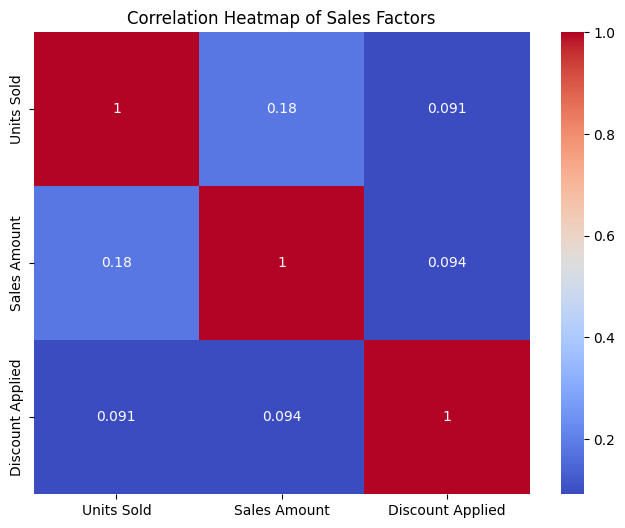

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(sales_data[['Units Sold', 'Sales Amount', 'Discount Applied']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Sales Factors")
plt.show()

Printing Cumulative Sales Line Chart

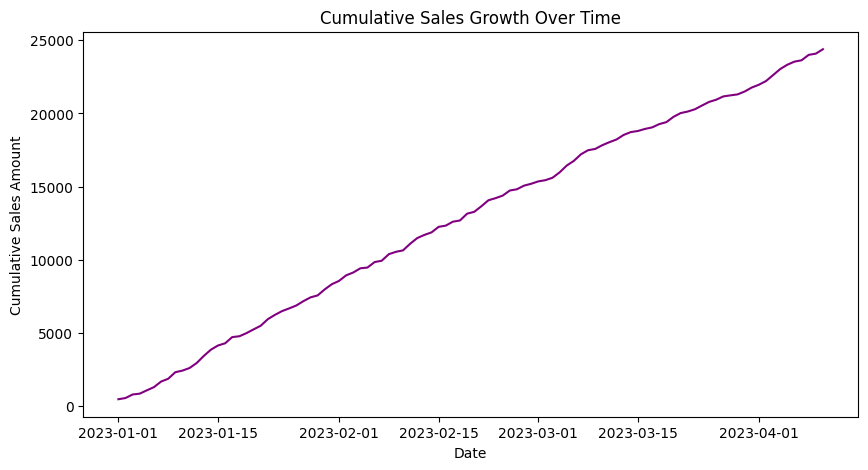

In [74]:
plt.figure(figsize=(10, 5))
plt.plot(sales_data['Date'], sales_data['Cumulative Sales'], color='purple')
plt.title("Cumulative Sales Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Sales Amount")
plt.show()

Printing Sales Distribution by Store

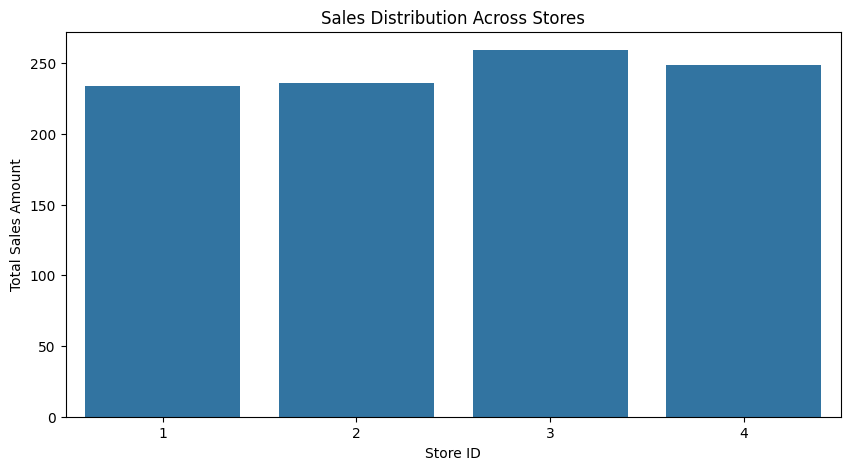

In [64]:
plt.figure(figsize=(10, 5))
sns.barplot(data=sales_data, x='Store ID', y='Sales Amount', ci=None)
plt.title("Sales Distribution Across Stores")
plt.xlabel("Store ID")
plt.ylabel("Total Sales Amount")
plt.show()

Printing Performance Comparison of Products

In [66]:
product_performance = sales_data.groupby('Product ID').agg(Total_Sales=('Sales Amount', 'sum')).reset_index()

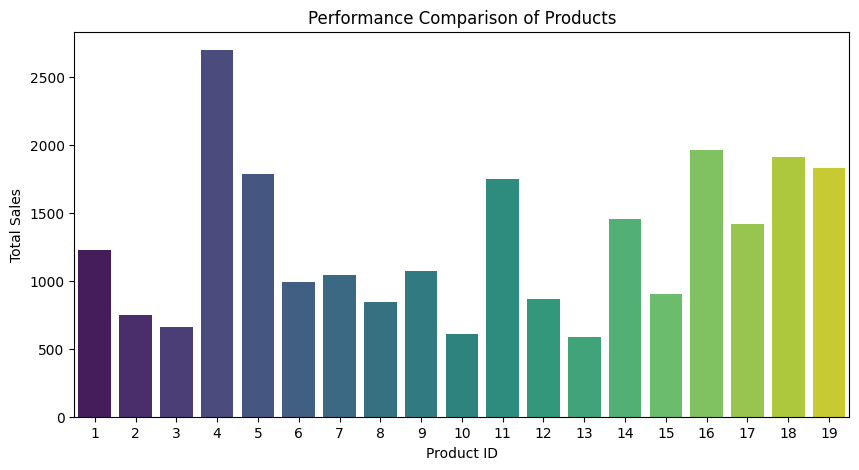

In [68]:
plt.figure(figsize=(10, 5))
sns.barplot(data=product_performance, x='Product ID', y='Total_Sales', palette='viridis')
plt.title("Performance Comparison of Products")
plt.xlabel("Product ID")
plt.ylabel("Total Sales")
plt.show()

Printing Sales trends over time

24MAI0091
VENKAT RAMANA G
USE CASE 01 IMPLEMENTATION..




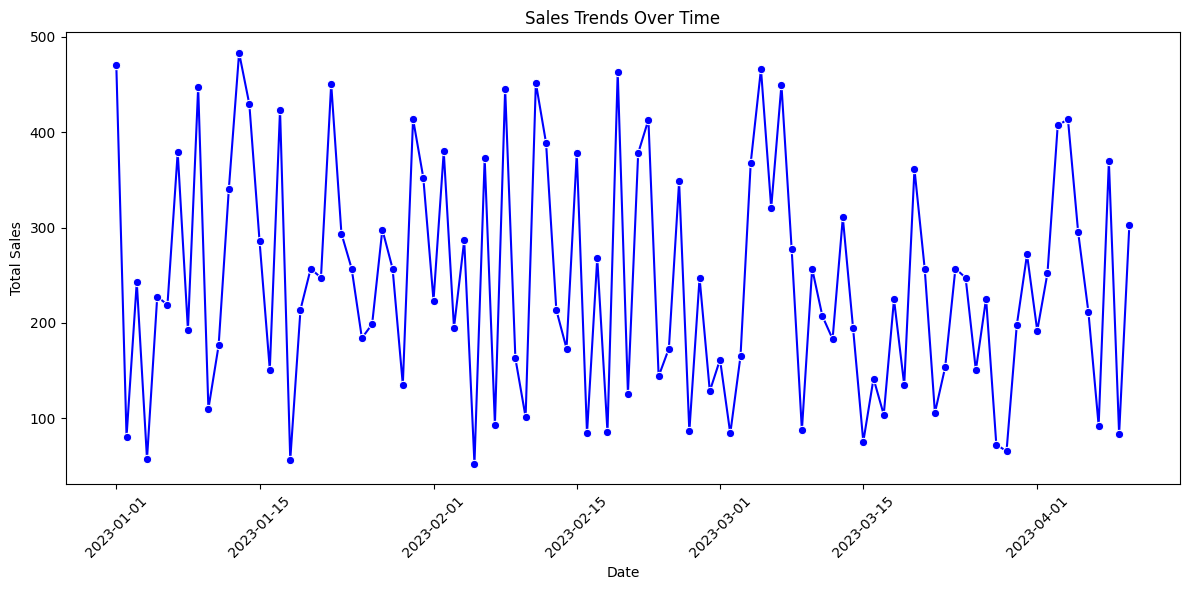

In [75]:
print("24MAI0091\nVENKAT RAMANA G\nUSE CASE 01 IMPLEMENTATION..")
print("\n")

plt.figure(figsize=(12, 6))
sns.lineplot(data=date_agg, x='Date', y='Total_Sales', color='blue', marker='o')
plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Printing Discount vs. Sales Elasticity Scatter Plot

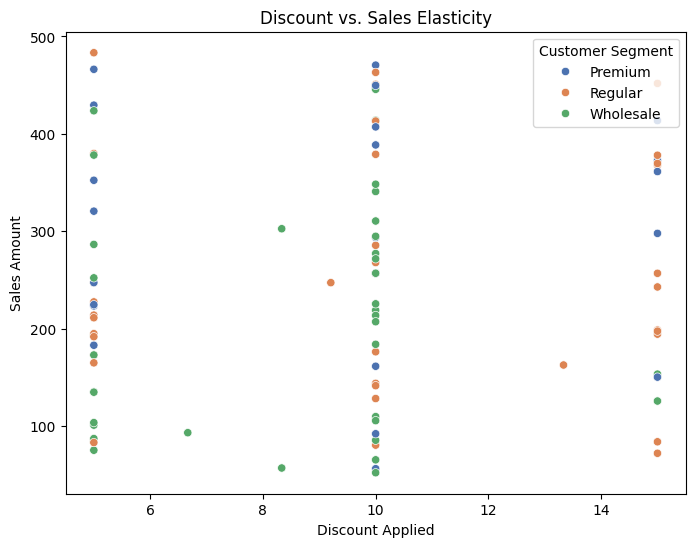

In [71]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sales_data, x='Discount Applied', y='Sales Amount', hue='Customer Segment', palette='deep')
plt.title("Discount vs. Sales Elasticity")
plt.xlabel("Discount Applied")
plt.ylabel("Sales Amount")
plt.legend(title="Customer Segment")
plt.show()

Printing an summary of all the tasks

In [84]:
# Automated Summary Report with Recommendations
print("\n=== Summary Report ===\n")
print("1. Customer Segmentation Analysis:\n\n", customer_segment_agg)
print("\n2. Weekly and Monthly Sales Trends:\n\n", weekly_sales, "\n", monthly_sales)


=== Summary Report ===

1. Customer Segmentation Analysis:

   Customer Segment  Total_Sales   Avg_Sales   Units_Sold
0          Premium  7217.454164  300.727257  1331.000000
1          Regular  9324.177201  245.373084  2112.477778
2        Wholesale  7843.248309  206.401271  1574.000000

2. Weekly and Monthly Sales Trends:

     Week  Total_Sales
0      1  1398.404748
1      2  2272.508415
2      3  1799.893334
3      4  1622.979030
4      5  1903.025494
5      6  2015.721249
6      7  1665.144217
7      8  1668.170144
8      9  1619.957180
9     10  1781.688204
10    11  1184.744714
11    12  1531.648208
12    13  1276.119454
13    14  1871.732581
14    15   302.599159
15    52   470.543543 
    Month  Total_Sales
0      1  8330.618087
1      2  6861.327890
2      3  6574.647660
3      4  2618.286038


In [85]:
print("\n3. Discount Elasticity Insights:\n", sales_data[['Discount Applied', 'Sales Amount', 'Elasticity']].dropna().describe())


3. Discount Elasticity Insights:
        Discount Applied  Sales Amount  Elasticity
count         99.000000     99.000000   99.000000
mean           9.251224    241.558951         NaN
std            3.604001    120.292841         NaN
min            5.000000     52.145417        -inf
25%            5.000000    147.085791   -1.244295
50%           10.000000    225.509979    0.412224
75%           10.000000    344.563529    1.360255
max           15.000000    483.285577         inf
